In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

In [61]:
df=pd.read_csv("bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [63]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [64]:
df.replace("unknown",pd.NA,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,-1,0,<NA>,no
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,-1,0,<NA>,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,-1,0,<NA>,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,-1,0,<NA>,no
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,-1,0,<NA>,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,<NA>,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,<NA>,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,<NA>,no


Text(0.5, 1.0, 'Target Variable Distribution')

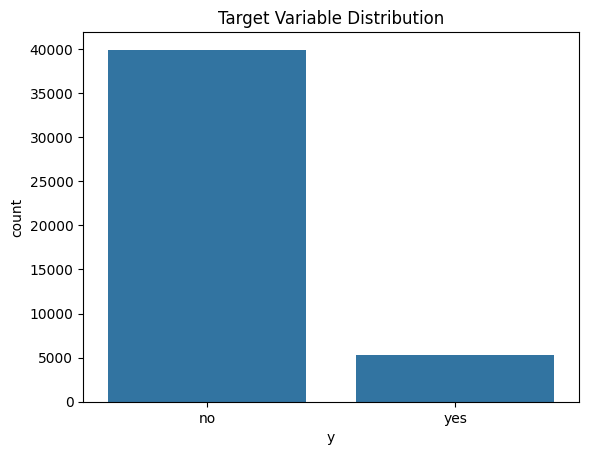

In [65]:
sns.countplot(x="y", data=df)
plt.title("Target Variable Distribution")

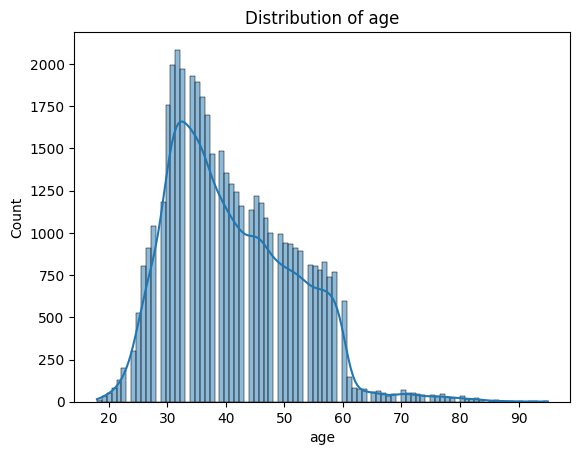

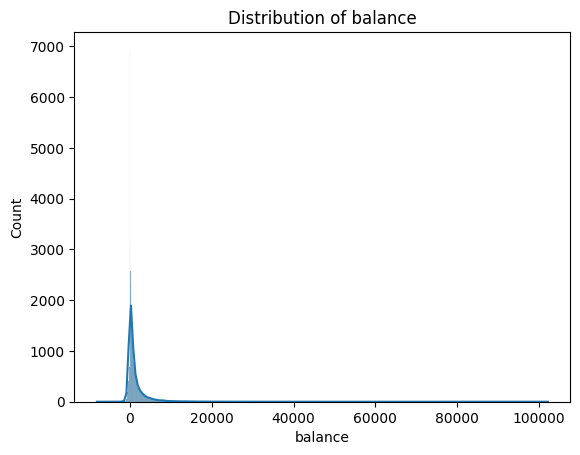

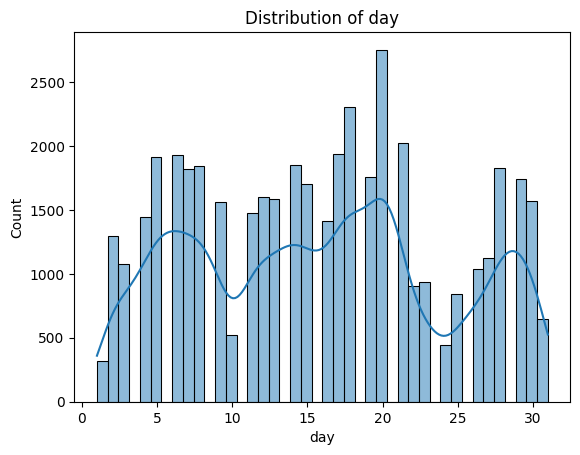

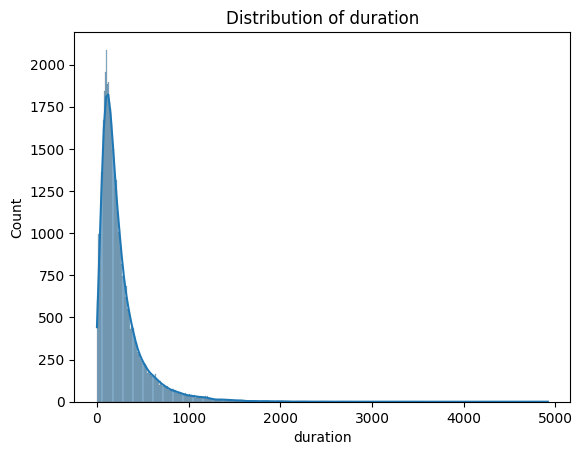

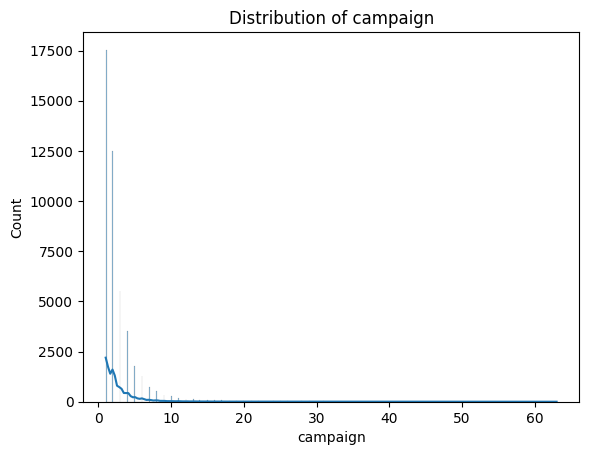

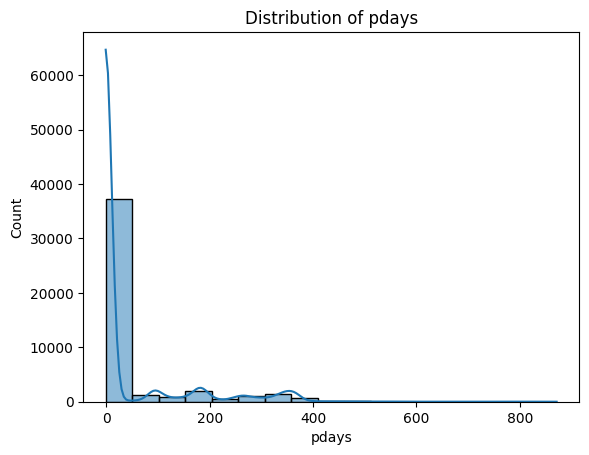

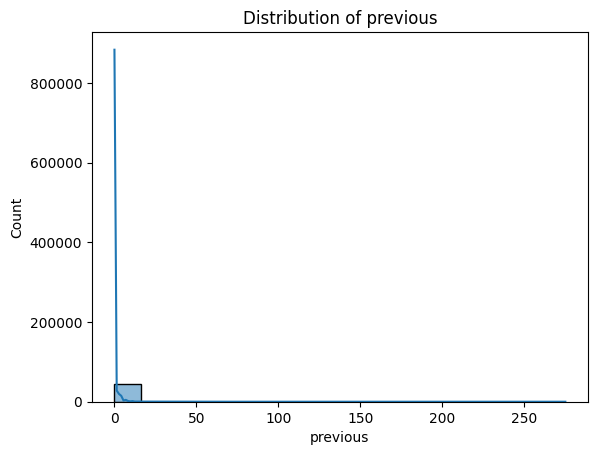

In [66]:
numeric_cols=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_cols:
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

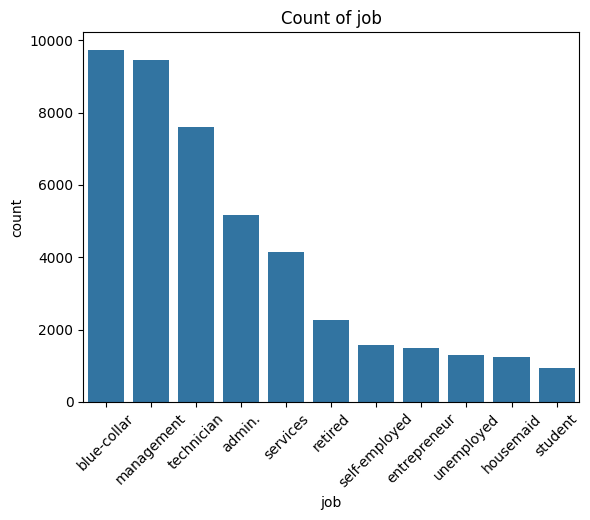

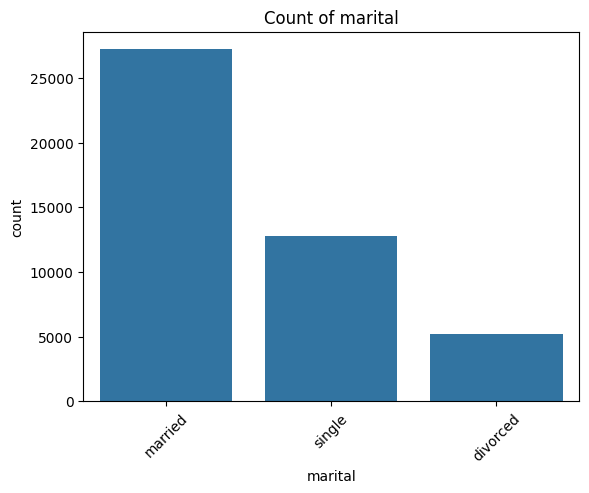

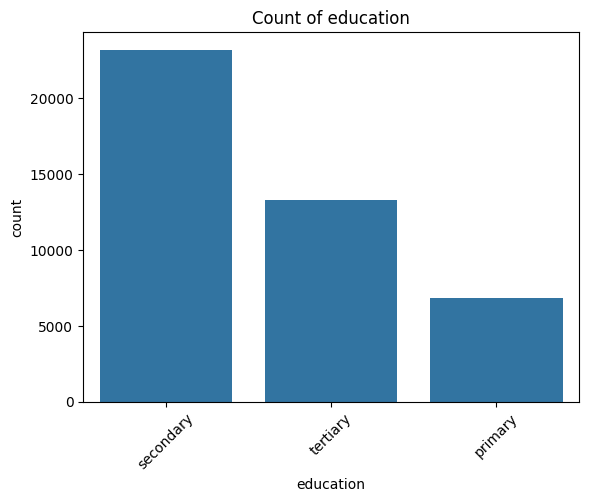

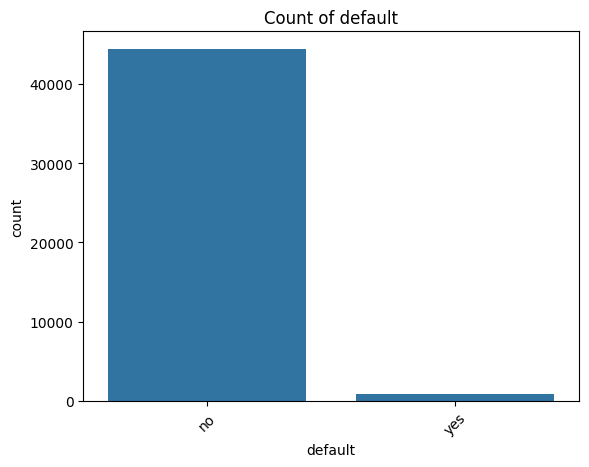

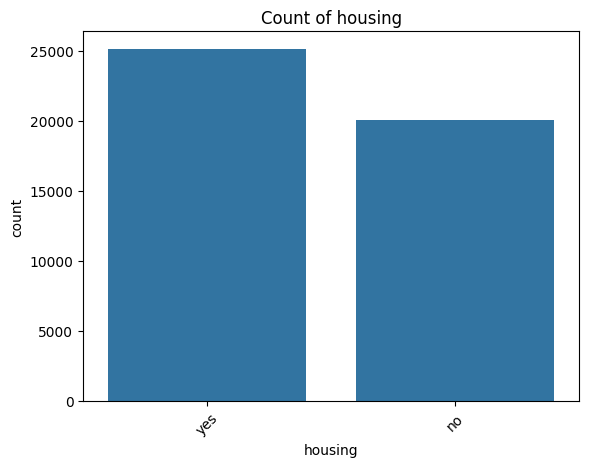

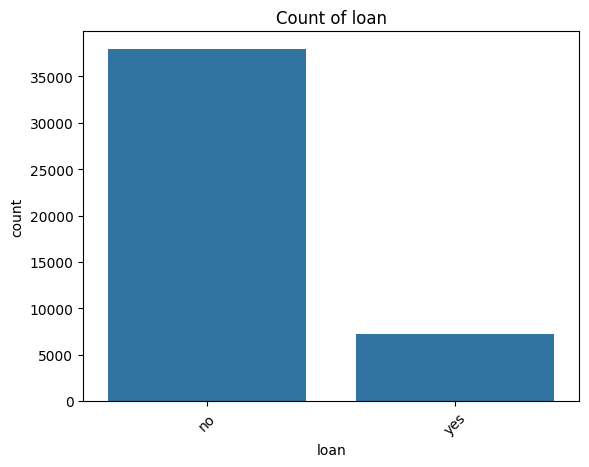

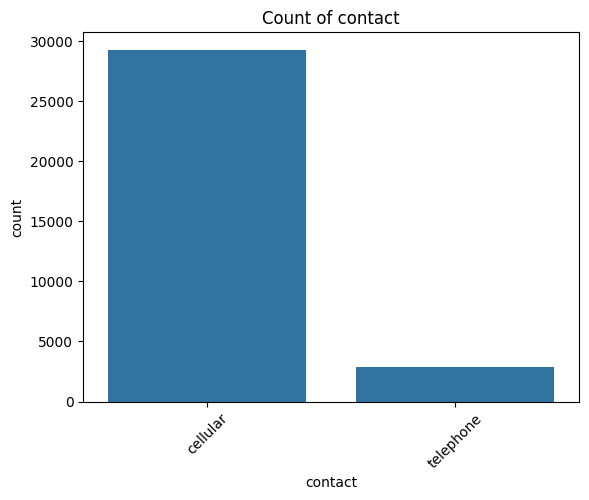

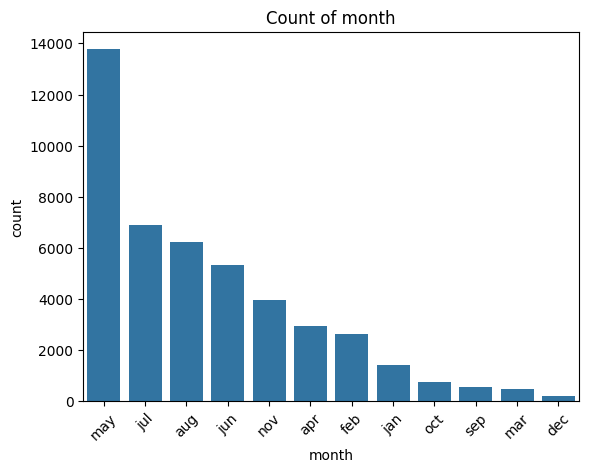

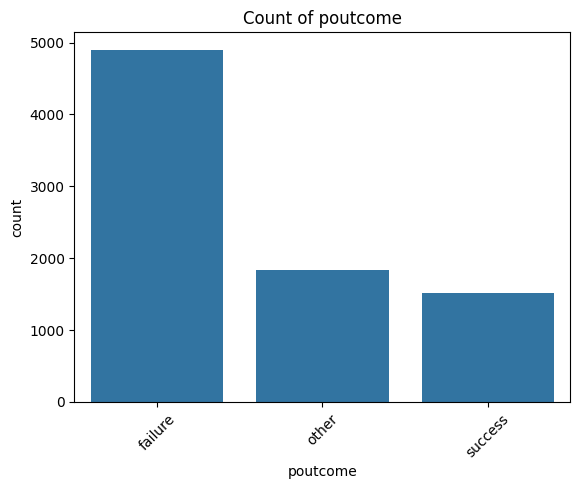

In [67]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


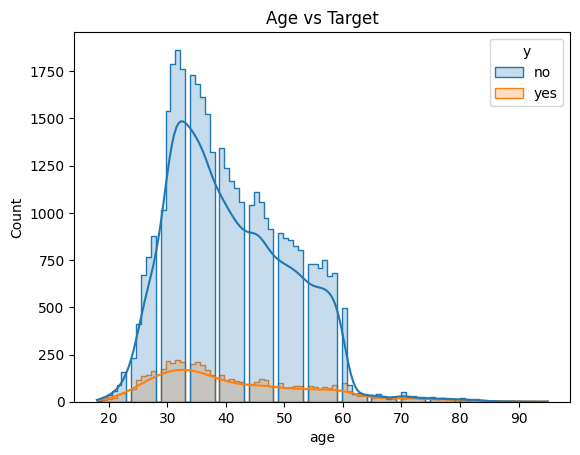

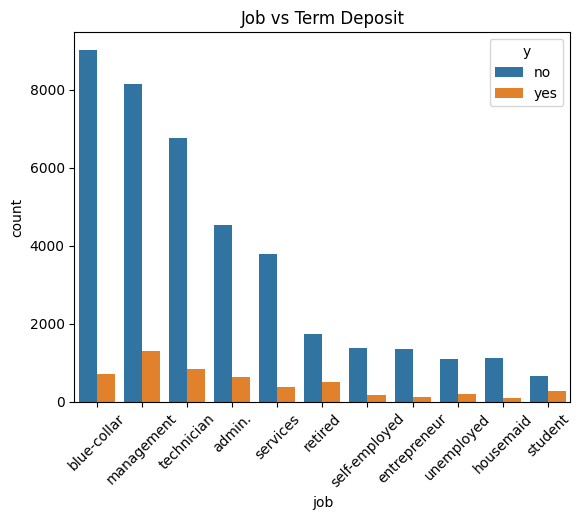

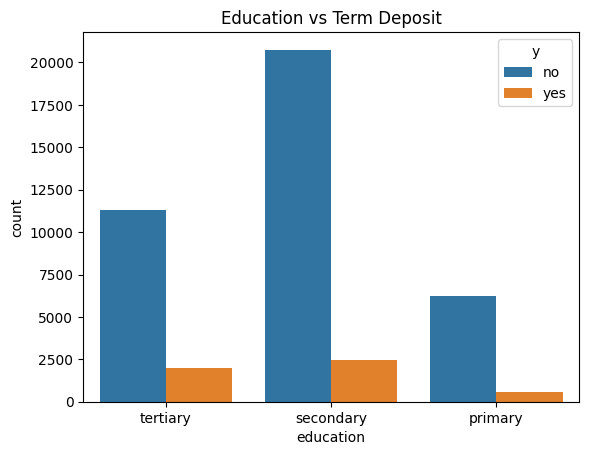

In [68]:
sns.histplot(data=df, x='age', hue='y', kde=True, element='step')
plt.title("Age vs Target")
plt.show()

sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Job vs Term Deposit")
plt.show()

sns.countplot(data=df, x='education', hue='y')
plt.title("Education vs Term Deposit")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

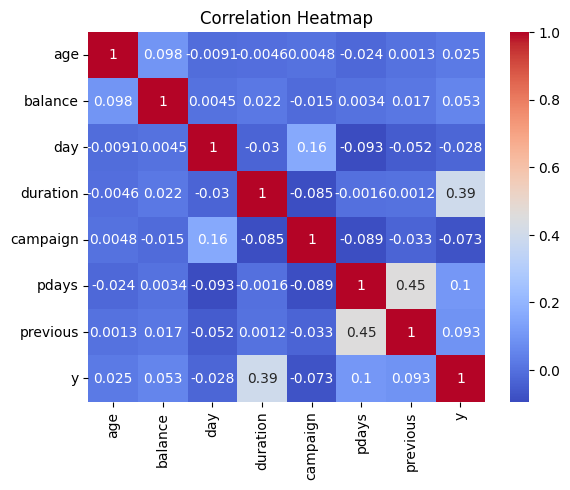

In [69]:
df_temp = df.copy()
df_temp['y'] = df_temp['y'].map({'yes': 1, 'no': 0})

sns.heatmap(df_temp[numeric_cols + ['y']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [70]:
df['job'] = df['job'].fillna('missing')
df['education'] = df['education'].fillna('missing')
df['contact'] = df['contact'].fillna('missing')
df['poutcome'] = df['poutcome'].fillna('missing')

In [71]:
categorical_cols = ['job', 'marital', 'education', 'default',
                    'housing', 'loan', 'contact', 'month', 'poutcome']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_missing,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,True,False,False
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,True,False,False
2,33,2,5,76,1,-1,0,no,False,True,...,False,False,False,True,False,False,False,True,False,False
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,True,False,False
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,True,False,False


In [72]:
X = df.drop(columns=['y'])
y = df['y'].map({'no': 0, 'yes': 1})  # Ensure target is numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9013601680858122
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [75]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8727192303439124
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7985
           1       0.46      0.48      0.47      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.88      0.87      0.87      9043



In [76]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9046776512219397
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [77]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9065575583324118
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.47      0.54      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



In [78]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.902134247484242
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.67      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8946146190423532
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.59      0.32      0.41      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.64      0.68      9043
weighted avg       0.88      0.89      0.88      9043



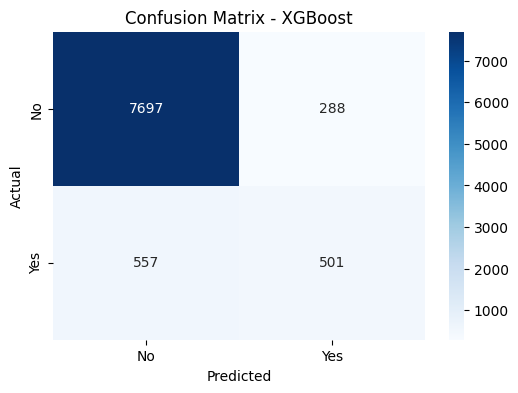

In [80]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

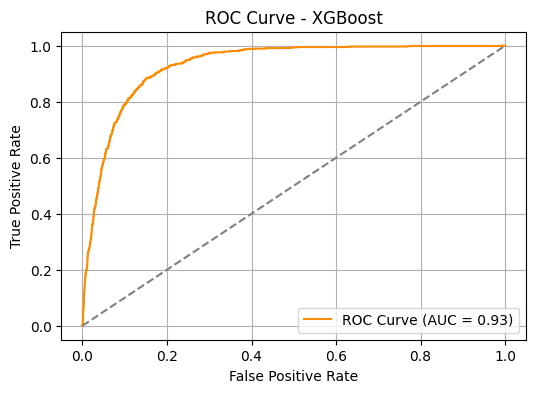

In [81]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


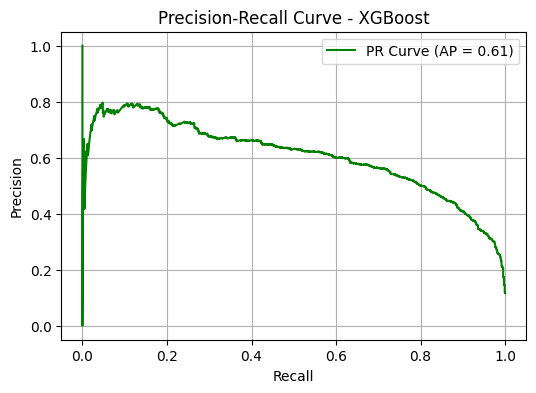

In [82]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc = average_precision_score(y_test, y_proba_xgb)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR Curve (AP = {pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

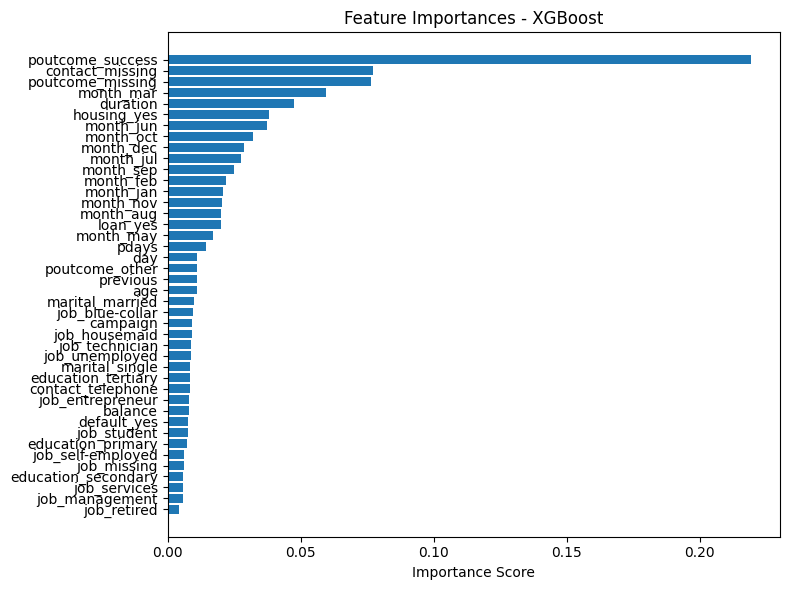

In [83]:
importances = xgb.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [features[i] for i in sorted_idx])
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()